In [1]:
#load all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt 
from pandas.io.json import json_normalize

In [2]:
youtubeUS = pd.read_csv("USvideos.csv") #load US data using raw string

In [3]:
youtubeGB = pd.read_csv("GBvideos.csv") #load Great Britain youtube data 

In [4]:
youtubeIN = pd.read_csv("INvideos.csv") #load India youtube data 

In [5]:
us_json = pd.read_json("US_category_id.json")

In [6]:
in_json = pd.read_json("IN_category_id.json")

In [7]:
gb_json = pd.read_json("GB_category_id.json")

In [8]:
youtubeUS.insert(0,"Country","US", True)
youtubeGB.insert(0,"Country","GB", True) #insert country column with country code
youtubeIN.insert(0,"Country","IN", True)

In [9]:
youtubeUSGBIN = pd.concat([youtubeUS, youtubeGB, youtubeIN]) #concat all three dataframes

In [10]:
#getting the ids and categories from India
recs=in_json['items']
in_cat=json_normalize(recs)[['id','snippet.title']]
#getting the ids and categories from USA
recs_us=us_json['items']
us_cat=json_normalize(recs_us)[['id','snippet.title']]
#getting the ids and categories from GB
recs_gb=gb_json['items']
gb_cat=json_normalize(recs_gb)[['id','snippet.title']]
#merging indian and USA categories
categories=pd.merge(in_cat,us_cat,on='id',how='outer')
#merging categories with GB categories
categories=pd.merge(categories,gb_cat,on='id',how='outer')
#dropping unnecessary columns
categories=categories.drop(['snippet.title_x','snippet.title'],axis=1).rename(columns={'snippet.title_y':'category'})

In [11]:
#converting id column of categories to int to merge with the original dataframe
categories['id']=categories['id'].astype('int')

In [13]:
origLen = len(youtubeUSGBIN)
df = youtubeUSGBIN.drop_duplicates().copy()
numDropped = origLen - len(df)
print('Dropped ' + str(numDropped) + ' rows.')

Dropped 4482 rows.


In [14]:
#adding categories column to the main dataframe "df"
df=pd.merge(left=df,right=categories,left_on='category_id',right_on='id')

In [15]:
df['likeability_ratio']=df['likes']/df['dislikes'].replace(0,1)
#NOTE: for channel_title such '9-1-1 on FOX', '90s Commercials', there are zero dislikes. We need to filter 
#such records and substitute 1 for 0

## Data Analysis

In order to answer our research questions, we created several visualizations and analyzed them.
i) Likeability ratio by category
In the bar chart below, we can see that the top categories in terms of likeability ratio across all three countries. "Music" category has by far the highest likeability ratio (over 112 likes per dislike) among all categories, followed by "Pets & Animals", "Education", "How to & Style", "People & Blogs" and "Nonprofits & Activism". For new Youtube video makers, making videos related to these categories is advisable because they have greater likeability ratios. Interesting to note is that “News and Politics” has the lowest likeability ratio (with only 10 likes to per dislike), which makes sense since this category tends to be very controversial and polarizing causing the ratio to be far lower compared to the other categories. Then, we created the same visualizaion separately for each country to identify differences between countries.

In [16]:
#Likeability ratios of videos belonging to all categories on average
df_cat_mean=df.groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

,category,likeability_ratio
8,Music,112.982257
12,Pets & Animals,64.141270
2,Education,45.769548
6,Howto & Style,44.736794
11,People & Blogs,44.082361


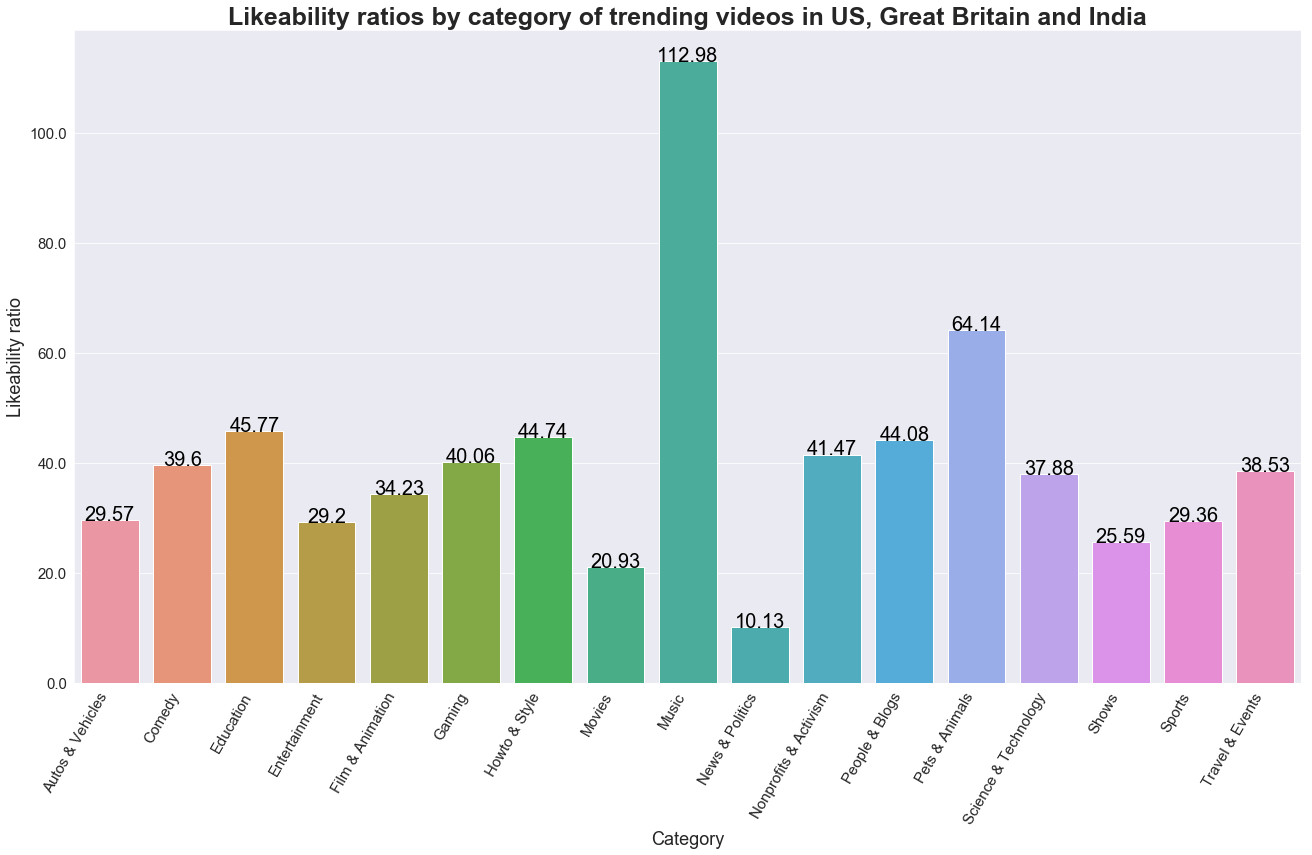

In [17]:
#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in US, Great Britain and India',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### United States

As we can see in the bar plot below, the top categories in terms of likeability ratio in the US were "Pets & Animals" (with over 62 likes per dislike), followed by "Music", "People & Blogs", "Howto & Style" and "Education". The lowest category was "News & Politics" (with just about 12 likes per dislike), which reflects the polarization and divisiveness of the population over politics in recent years.  

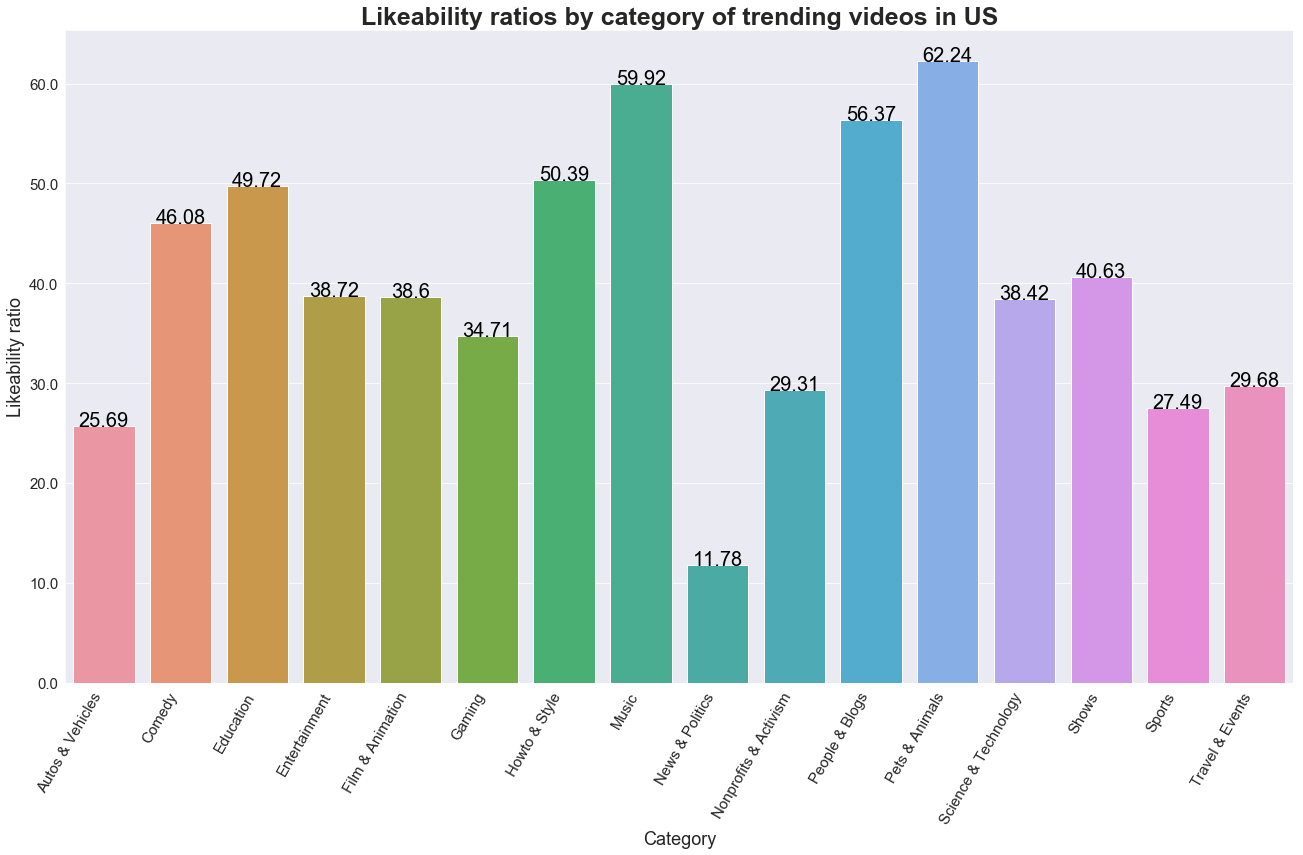

In [18]:
df_cat_mean=df[df['Country'] == 'US'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in US',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### Great Britain

The bar plot below portrays the top categories in terms of likeability ratio in Great Britain. "Music" was the top ranked category (with over 158 likes per dislike), followed by "Shows" (over 131 likes per dislike), "Travel & Events", "Pets & Animals", and "Nonprofits & Activism". Similar to the US, "News & Politics" (with only 14 likes per dislike) ranked last. Interestingly, "Sports" was ranked second to last, which also makes sense because people have different rooting interests in terms of the teams they follow and teams they don't like. 

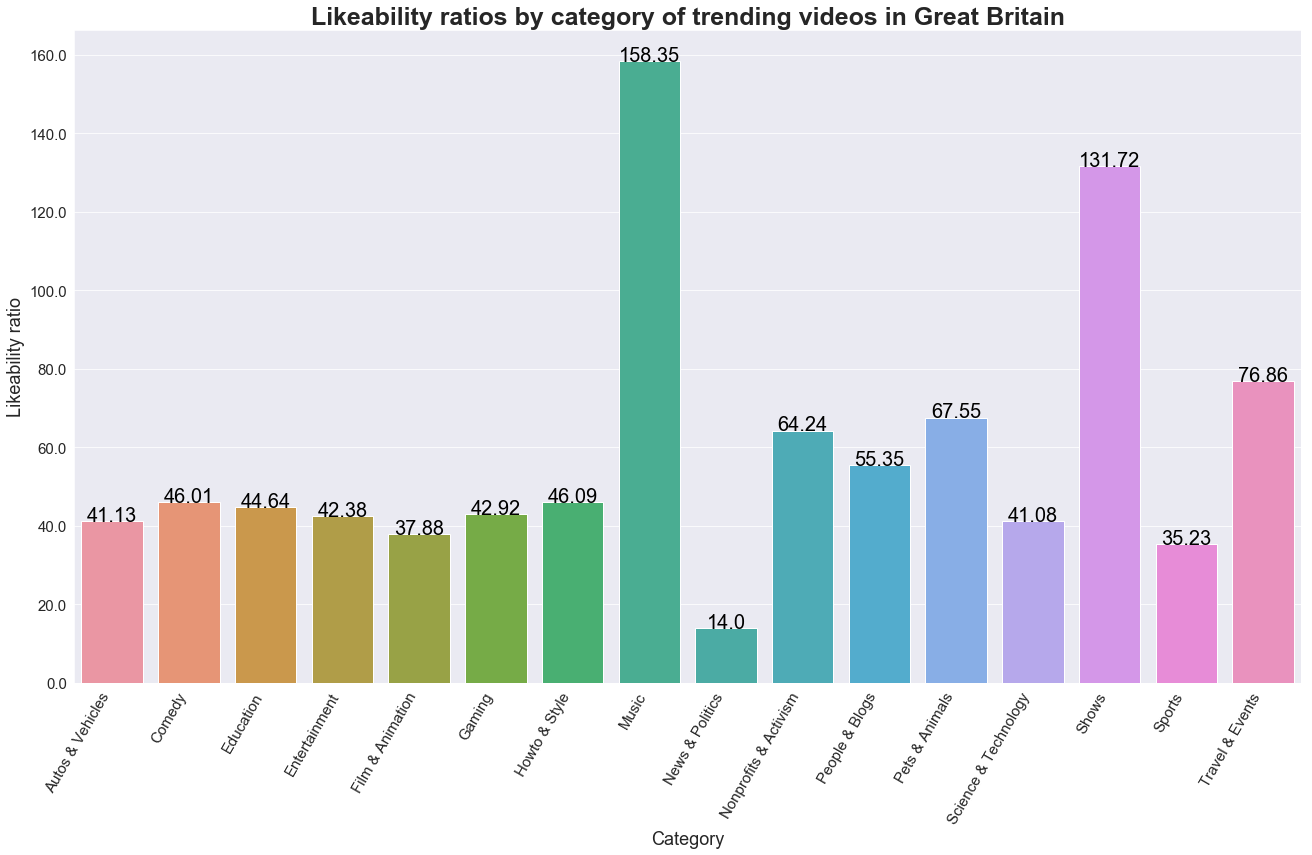

In [19]:
df_cat_mean=df[df['Country'] == 'GB'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in Great Britain',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

##### India

For India, the distribution of likeability ratios by category were quite different from the US and Great Britain. The range was from a minimum of about 5 to slightly over 40, which is much lower than the top ratios for the other two countries. The top categories in terms of likeability ratio in India was "Pets & Animals" (with over 41 likes per dislike), followed by "Education" (over 40 likes per dislike), "Science & Technology", "Music", and "Comedy". Interestingly, "Shows" category was ranked last (with only about 5 likes per dislike). Similar to the other two countries, "News & Politics" (with only about 8 likes per dislike) ranked towards the bottom of the list in terms of likeability ratio. As we can see, the preferences of viewers in India were quite different from the US and Great Britain.    

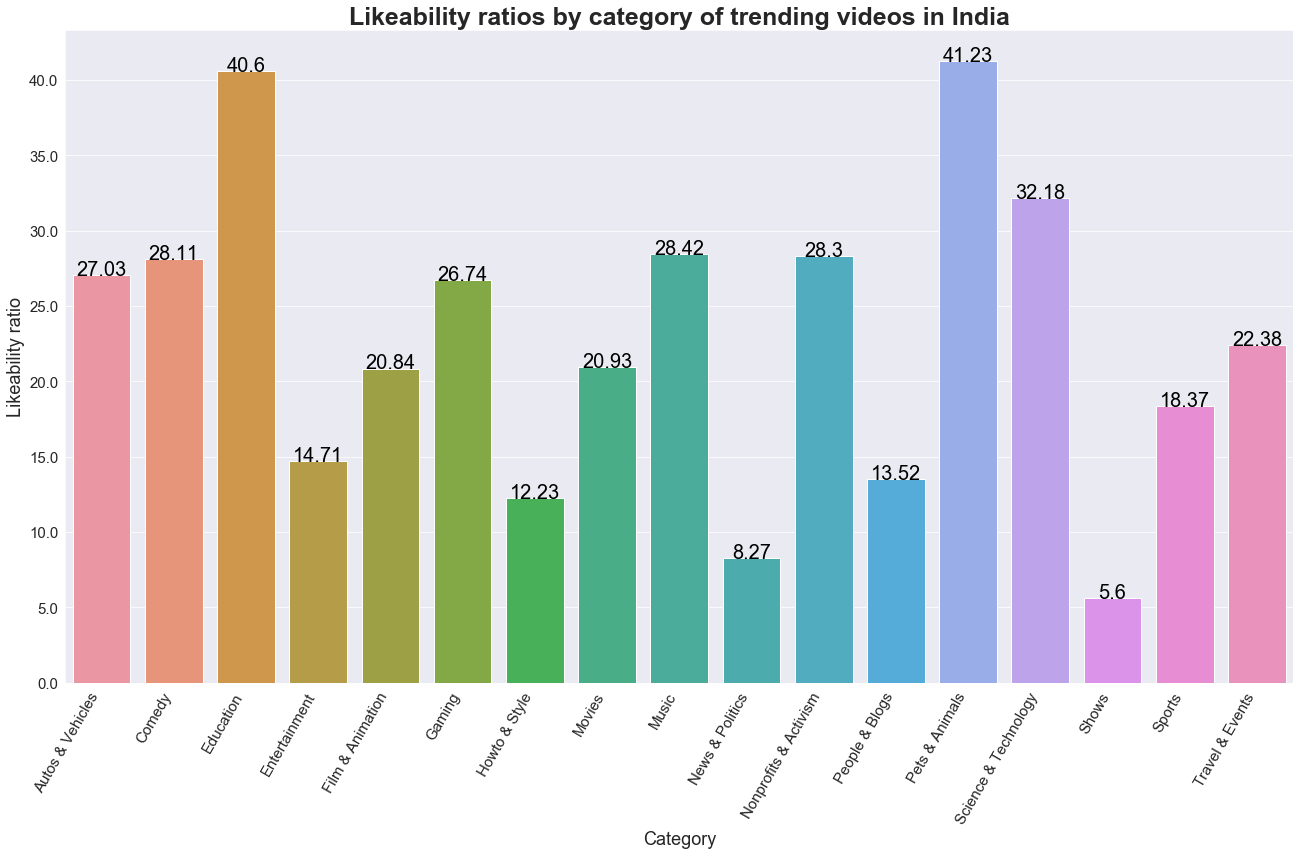

In [20]:
df_cat_mean=df[df['Country'] == 'IN'].groupby('category',as_index=False)['likeability_ratio'].mean()
df_cat_mean.sort_values('likeability_ratio',ascending=False).head()

#getting a visualization of the categories with the highest likeability ratio
plt.figure(figsize=(22,12))
sns.set_style("darkgrid")
ax = sns.barplot(x="category",y="likeability_ratio", data=df_cat_mean)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Likeability ratio',fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),size = 15, rotation = 60, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticks(), size = 15)
plt.title('Likeability ratios by category of trending videos in India',size=25, weight='bold')
for index, row in df_cat_mean.iterrows():
    ax.text(row.name,row.likeability_ratio, round(row.likeability_ratio,2), color='black', ha="center", size = 20)
plt.show()

### (ii) Number of videos by category

In the bar plot below, we see that the top categories in terms of the number of videos is "Entertainment" (with 33,763 videos over the given time period) and "Music" (23,459 videos). Both of these categories have significantly higher number of videos (more than rest of the categories combined). "People & Blogs", "News & Politics" and "Comedy" (all with over 8,000 videos) ranked third, fourth and fifth respectively.

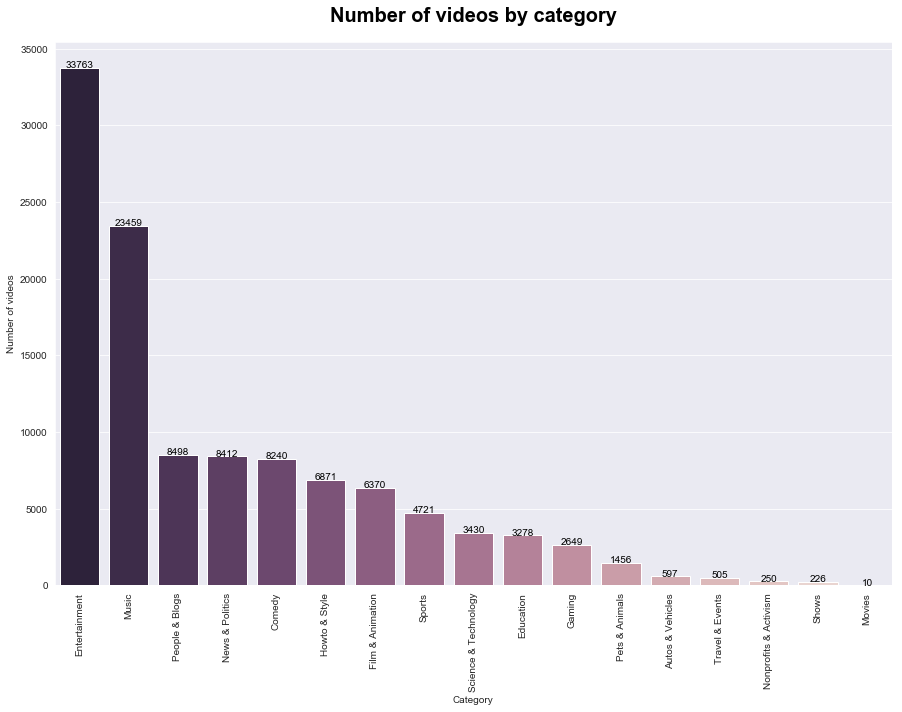

In [21]:
cdf = df["category"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category", "category": "No_of_videos"}, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
_ = sns.barplot(x="category", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Number of videos")
for index, row in cdf.iterrows():
    ax.text(row.name,row.No_of_videos, round(row.No_of_videos,2), color='black', ha="center", size = 10)
_=ax.set_title('Number of videos by category', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'black'}, pad=20)